In [1]:
# Imports und basic setup
# Try to use the Lab Widgets or if not possible the NB widgets and if nothing works just static plots
try:
    %matplotlib widget
except:
    try:
        %matplotlib notebook
    except:
        %matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Exercise 1.1: Nerve Conduction Velocity

To test for Guillain-Barré syndrome (GBS) the nerve conduction velocity of multiple patients was measured.
The test records the time a electrical signal takes to travel along the forearm of a patient from the elbow to the wrist.
To reduce the potential of measurement errors, each patient was measured 3 times.
The results in $ms$ are provided as the `measurements` DataFrame below.
The same DataFrame also provides the length of the forearm in $cm$.

a) Create a function that takes the data of a all patient as input and calculates the mean and the std of the patient's nerve conduction velocity in $m/s$.

Tip: Try to make use of `numpy`'s vectorisation to perform the calculation without using an explicit loop.

b) Which of these patients might has GBS? Assume a healthy velocity of around 45-70 $m/s$.

In [2]:
measurements = {
    'p1': {'forearm': 45., 'times': np.array([9.7, 9.8, 10.1]) },
    'p2': {'forearm': 47., 'times': np.array([14.2, 12.4, 13.6]) },
    'p3': {'forearm': 50., 'times': np.array([8. , 8.3, 8.2]) },
    'p4': {'forearm': 48., 'times': np.array([10.2,  8. , 10.6]) },
}

# Convert to DataFrame for nicer visualisation
measurements = pd.DataFrame(measurements).T
measurements

,forearm,times
p1,45.0,"[9.7, 9.8, 10.1]"
p2,47.0,"[14.2, 12.4, 13.6]"
p3,50.0,"[8.0, 8.3, 8.2]"
p4,48.0,"[10.2, 8.0, 10.6]"


In [3]:
# Extract the values as numpy arrays for faster computations
times = np.vstack(measurements.times.values)
forearms = np.array(measurements.forearm.tolist())
print(times)
print(forearms)

[[ 9.7  9.8 10.1]
 [14.2 12.4 13.6]
 [ 8.   8.3  8.2]
 [10.2  8.  10.6]]
[45. 47. 50. 48.]


In [4]:
def nerve_conduction_velocity(times, forearm_length):
    ### BEGIN SOLUTION
    # array[:, None] or array[:, np.newaxis] is used to allow broadcasting
    # Learn more about this e.g. here
    # https://stackoverflow.com/questions/29241056/how-does-numpy-newaxis-work-and-when-to-use-it
    vel = (forearm_length[:, None] / 100) / (times / 1000)
    vel_mean = np.mean(vel, axis=1)
    vel_std = np.std(vel, axis=1)
    ### END SOLUTION
    return vel_mean, vel_std

In [5]:
# We are passing the data of all patients into the function at once
vel_mean, vel_std = nerve_conduction_velocity(times, forearms)

# Add the new columns back to the DataFrame for nicer visualisation
measurements['vel_mean'] = vel_mean
measurements['vel_std'] = vel_std

measurements

,forearm,times,vel_mean,vel_std
p1,45.0,"[9.7, 9.8, 10.1]",45.621525,0.778889
p2,47.0,"[14.2, 12.4, 13.6]",35.186880,2.011131
p3,50.0,"[8.0, 8.3, 8.2]",61.238858,0.940846
p4,48.0,"[10.2, 8.0, 10.6]",50.780614,6.559277


In [6]:
# Create a new column that indicates if a patient has normal or abnormal nerve conduction velocity
### BEGIN SOLUTION
measurements['normal'] = measurements.vel_mean.between(45, 70)
### END SOLUTION
measurements

,forearm,times,vel_mean,vel_std,normal
p1,45.0,"[9.7, 9.8, 10.1]",45.621525,0.778889,True
p2,47.0,"[14.2, 12.4, 13.6]",35.186880,2.011131,False
p3,50.0,"[8.0, 8.3, 8.2]",61.238858,0.940846,True
p4,48.0,"[10.2, 8.0, 10.6]",50.780614,6.559277,True


## Exercise 2.1: Import Data and Visualisation

The two most common data formats you will encounter in biosignal analysis are `csv` and `hdf5`.
The former is usually used for smaller amounts of data that fit into a table format.
The big advantage of `csv` files is that you can view them with any text editor.
However, `csv` files tend to be large compared to other file formats, because the stored data is not compressed.

This is where HDF5 shines. It uses a compressed format and can store metadata together with the raw measurement values.
However, you need special readers to open HDF5 files.

Python can handle both filetypes easily.
CSV is supported by Pandas (and Numpy) directly and the package `h5py` can be used to load HDF5 files.
Have a look at the supplementary notebook `HDF5_reminder.ipynb` to learn about the latter.

a) In the folder `./data` 3 biosignals are stored in different file formats.
Load each of them by filling in the missing lines of code below.

b) Adapt the index of each DataFrame so that it represents seconds and not samples. The sampling information is provided in the skeleton code.

c) Plot each Biosignal with an appropriate x axis. Tip: You can use the plot functionality of pandas to easily plot the DataFrame.

d) Can you guess which type of biosignal each one is? Give each plot a title with the name of the biosignal.


### Solution:

a - c) See code

d)
- *Signal 1* is a human gait signal recorded with an intertial measurement unit (IMU) attached to the shoe. The most characteristic part of the signal is the `gyr_y` (rotation rate around the lateral axis). This pattern is commenly used to identify strides in such a signal.

- *Signal 2* is an EKG signal. You can easily identify the individual QRS complexes. As you may noted, the baseline of the signal is drifting. This is a common problem with EKG signals and can for example be caused by changes in temperature. We will learn in a later exercise, how to deal with this "low frequency" disturbances of a signal.

- *Signal 3* is an EMG signal recorded during a leg exercise. This is hard to tell from the data itself. But luckely the h5 file provides enough metadata to solve this mistery.

In [7]:
from pathlib import Path  # We use this so that the path works on Win and Mac

In [8]:
# Dataset 1
ds1_path = Path('./data/signal1.csv')

# Load dataset 1 into the variable ds1 as pandas DataFrame
### BEGIN SOLUTION
ds1 = pd.read_csv(ds1_path, header=0, index_col=0)
### END SOLUTION
# Adapt the index to seconds. Signal 1: sampling_rate = 204.8 Hz
s1_sampling_rate = 204.8 # Hz
### BEGIN SOLUTION
ds1.index /= s1_sampling_rate
ds1.index -= ds1.index[0]  # Optional
### END SOLUTION
ds1.index.name = 'time [s]'
ds1.head()

,gyr_x,gyr_y,gyr_z,acc_x,acc_y,acc_z
time [s],,,,,,
0.000000,-50.537109,362.854004,-25.817871,0.250000,-0.332031,2.442871
0.004883,-55.847168,352.783203,-36.010742,0.249512,-0.270508,2.516602
0.009766,-60.302734,341.552734,-44.921875,0.306641,-0.209961,2.681152
0.014648,-58.410645,330.017090,-52.246094,0.321777,-0.140625,2.857910
0.019531,-55.114746,322.082520,-58.715820,0.296387,-0.079590,2.981934


In [9]:
# Dataset 2
ds2_path = Path('./data/signal2.txt')

# Load dataset 1 into the variable ds2 as pandas DataFrame
### BEGIN SOLUTION
ds2 = pd.read_csv(ds2_path, header=None)
### END SOLUTION
# Adapt the index to seconds. Signal 2: sampling_time = 0.48ms
s2_sampling_time = 0.48 # ms
### BEGIN SOLUTION
ds2.index *= s2_sampling_time / 1000
### END SOLUTION
ds2.index.name = 'time [s]'
ds2.head()

,0
time [s],
0.00000,-1478.8
0.00048,-1478.8
0.00096,-1478.8
0.00144,-1478.8
0.00192,-1478.8


In [10]:
import h5py
# Dataset 3
ds3_path = Path('./data/signal3.h5')

# Load dataset 3 and store the "tibialis" recording in the variable ds3 as DataFrame
### BEGIN SOLUTION
h5_object = h5py.File(ds3_path, 'r')
ds3 = h5_object['trial1/muscles/tibialis'][()]
ds3 = pd.DataFrame(ds3)
### END SOLUTION
# Adapt the index to seconds. Signal 3: Extract the sampling rate from the h5 file.
### BEGIN SOLUTION
s3_sampling_rate = h5_object['trial1/muscles/tibialis'].attrs['sampling rate']
ds3.index /= s3_sampling_rate
### END SOLUTION
ds3.index.name = 'time [s]'
ds3.head()

,0
time [s],
0.0000,0.177917
0.0005,0.172958
0.0010,0.194855
0.0015,0.211258
0.0020,0.183716


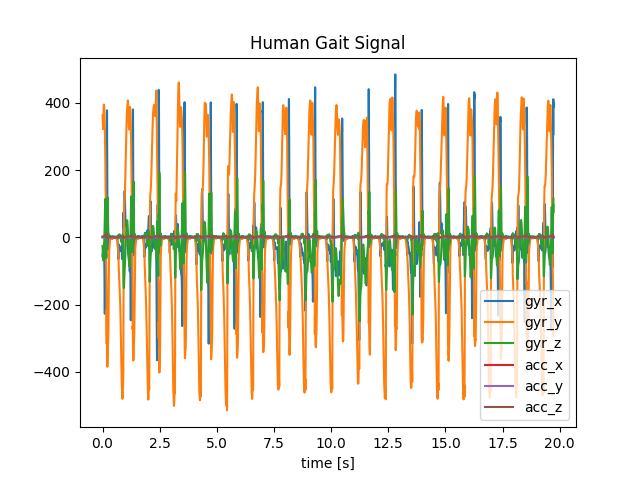

In [11]:
# Plot Signal 1
### BEGIN SOLUTION
ds1.plot()
plt.title('Human Gait Signal');
### END SOLUTION


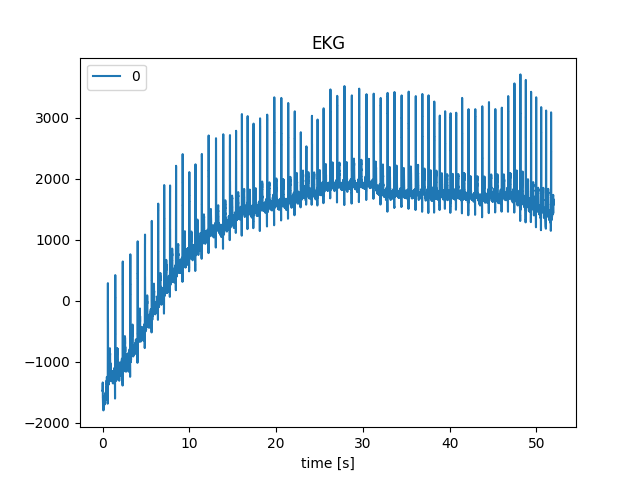

In [12]:
# Plot Signal 2
### BEGIN SOLUTION
ds2.plot()
plt.title('EKG');
### END SOLUTION

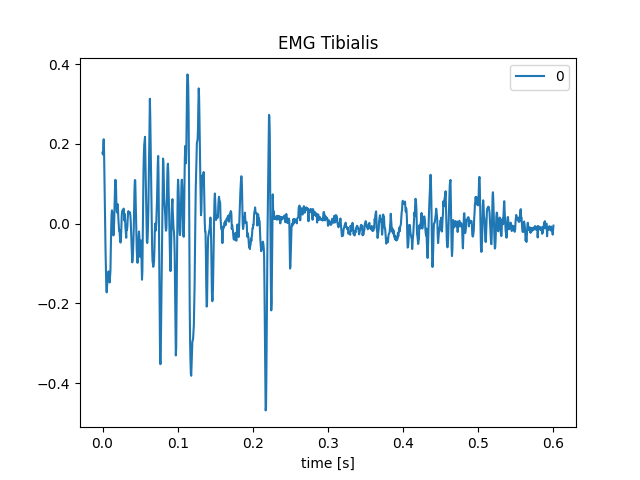

In [13]:
# Plot Signal 3
### BEGIN SOLUTION
ds3.plot()
plt.title('EMG Tibialis');
### END SOLUTION